# Predictive maintenance of a CNC milling machine

## Predictive maintenance

To be continued...

## Experimental set-up

<img src="figures/exp_setup.png" alt="experimental setup" width="600"/>

## Dataset description

The raw downloaded data is placed in the `data/raw/` directory and unziped. The data has an internal directory structure:

```
├── c1 
│   ├── c1
│   │   ├── c_1_001.csv
│   │   ├── c_1_002.csv
│   │   ├── ...
│   ├── c1_wear.csv
├── c2 
│   ├── c2
│   │   ├── c_2_001.csv
│   │   ├── c_2_002.csv
│   │   ├── ...
├── c3 
│   ├── c3
│   │   ├── c_3_001.csv
│   │   ├── c_3_002.csv
│   │   ├── ...
├── c4 
│   ├── c4
│   │   ├── c_4_001.csv
│   │   ├── c_4_002.csv
│   │   ├── ...
│   ├── c4_wear.csv
├── c5 
│   ├── c5
│   │   ├── c_5_001.csv
│   │   ├── c_5_002.csv
│   │   ├── ...
├── c6 
│   ├── c6
│   │   ├── c_6_001.csv
│   │   ├── c_6_002.csv
│   │   ├── ...
│   ├── c6_wear.csv

```



Each `c$number/c$number` directory corresponds to a test of 315 cuts measured by the monitoring system mounted on the CNC milling machine as it removed material off the metal piece. The data the monitoring system recorded was:

* Column 1: Force (N) in X dimension
* Column 2: Force (N) in Y dimension
* Column 3: Force (N) in Z dimension
* Column 4: Vibration (g) in X dimension
* Column 5: Vibration (g) in Y dimension
* Column 6: Vibration (g) in Z dimension
* Column 7: AE-RMS (V)

The actual wear in units of $10^{-3}$ mm is available for tests 1, 4 and 6 in the `c$number_wear.csv` files.

## Import and preprocessing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/c1/c1/c_1_001.csv', sep=',', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127399 entries, 0 to 127398
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       127399 non-null  float64
 1   1       127399 non-null  float64
 2   2       127399 non-null  float64
 3   3       127399 non-null  float64
 4   4       127399 non-null  float64
 5   5       127399 non-null  float64
 6   6       127399 non-null  float64
dtypes: float64(7)
memory usage: 6.8 MB


In [4]:
df.head(10)

,0,1,2,3,4,5,6
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004
1,0.772,-0.573,-1.153,-0.056,-0.057,-0.058,-0.004
2,0.828,-0.673,-1.242,0.037,0.019,0.031,-0.004
3,0.866,-0.601,-1.311,-0.028,-0.027,-0.022,-0.004
4,0.910,-0.377,-1.341,-0.050,-0.049,-0.058,-0.004
5,0.896,-0.095,-1.333,0.022,0.036,0.017,-0.004
6,0.910,0.239,-1.270,-0.062,-0.038,-0.047,-0.004
7,0.900,0.614,-1.209,-0.089,-0.067,-0.070,-0.004
8,0.879,0.974,-1.137,-0.028,-0.009,0.003,-0.004
9,0.906,1.291,-1.047,-0.093,-0.082,-0.072,-0.004


## Signal visualization

### Forces

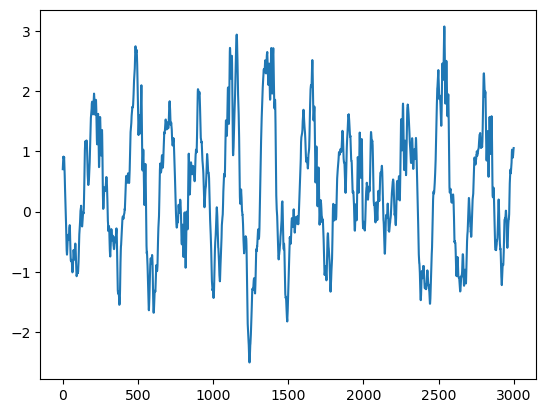

In [13]:
plt.plot(df[0][:3000])

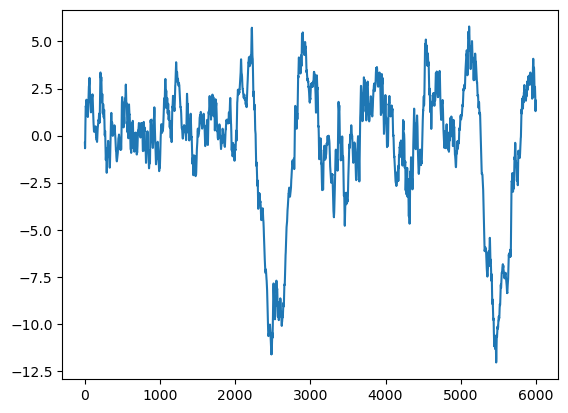

In [18]:
plt.plot(df[1][:6000])

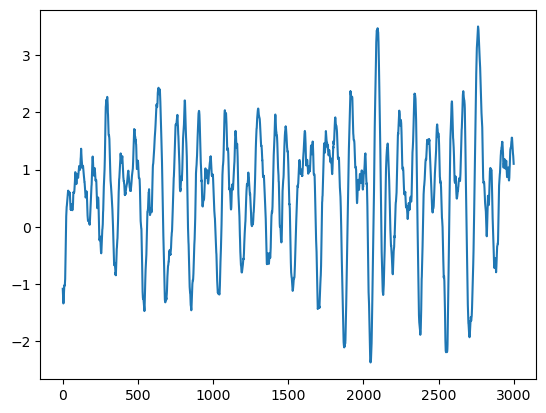

In [16]:
plt.plot(df[2][:3000])

### Vibrations

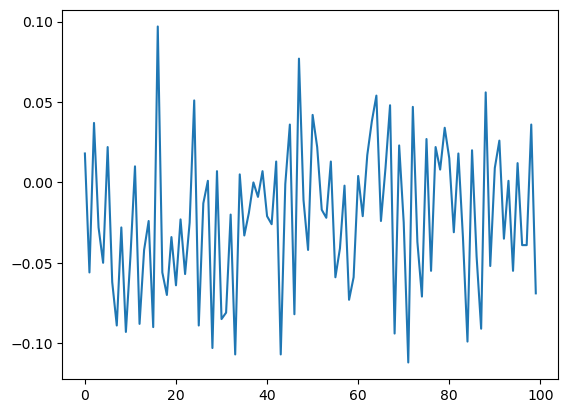

In [27]:
plt.plot(df[3][:100])

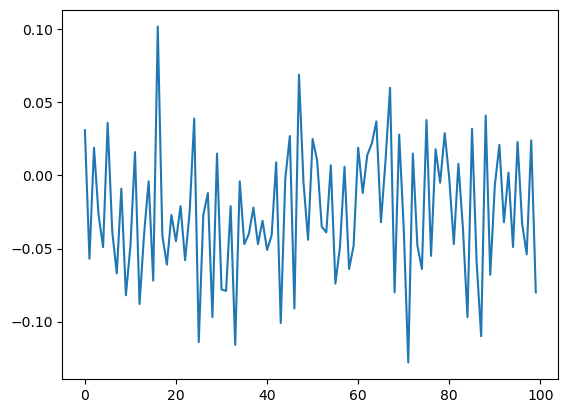

In [29]:
plt.plot(df[4][:100])

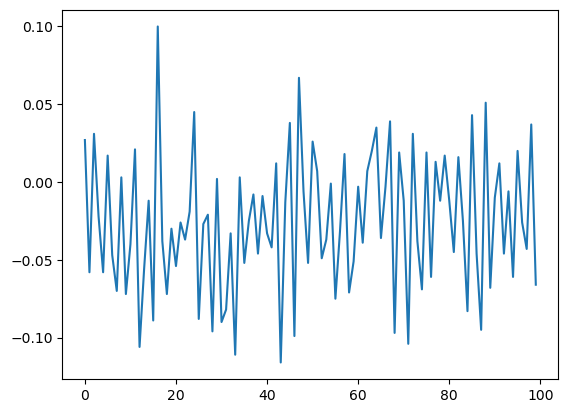

In [28]:
plt.plot(df[5][:100])